In [2]:
import seaborn as sns
df = sns.load_dataset('anscombe')

In [3]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [4]:
df.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [5]:
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


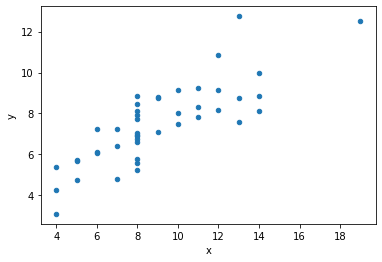

In [7]:
df.plot.scatter('x','y')

In [8]:
df['dataset'].value_counts()

III    11
IV     11
I      11
II     11
Name: dataset, dtype: int64

In [9]:
df.groupby('dataset').mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


Text(0.5, 1.0, 'y values')

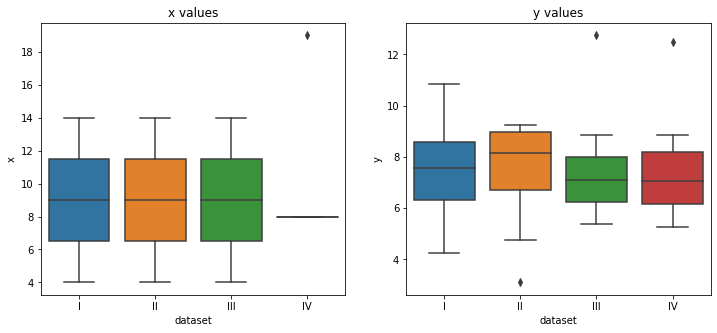

In [22]:
from matplotlib import pyplot as plt
plt.figure(figsize = (12,5))
plt.subplot(1,2,1) # r, c, fignum
sns.boxplot(x = df['dataset'], y = df['x'])
plt.title('x values')

plt.subplot(1,2,2)
sns.boxplot(x = df['dataset'], y = df['y'])
plt.title('y values')

Text(0.5, 1.0, 'y values')

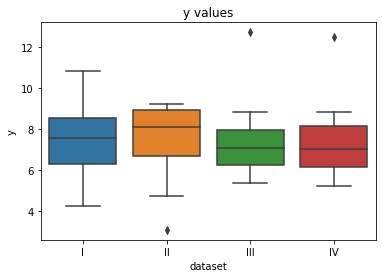

In [18]:
df.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [19]:
df.groupby('dataset').median()

,x,y
dataset,,
I,9.0,7.58
II,9.0,8.14
III,9.0,7.11
IV,8.0,7.04


In [25]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [28]:
x = np.random.random(size = (100)) * 10
y = 4 * x + 3

In [31]:
noise = np.random.normal(0.0,4.0, size=(100) )

In [32]:
ytrain = y + noise

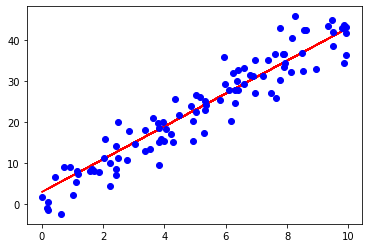

In [34]:
plt.plot(x, y, 'r-')
plt.plot(x, ytrain, 'bo')

In [41]:
best_mse = np.inf
best_a, best_b = None, None
for i in range(1000):

    a = np.random.random() * 10
    b = np.random.random() * 10
    yhat = a * x + b
    mse = np.sum((yhat - ytrain) ** 2)/yhat.shape[0]
    if mse <=best_mse:
        best_mse = mse
        best_a = a
        best_b = b
    

In [42]:
yhat = best_a*x + best_b

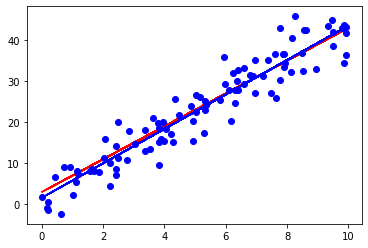

In [43]:
plt.plot(x, y, 'r-')
plt.plot(x, ytrain, 'bo')
plt.plot(x, yhat, 'b-')

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [61]:
m = LinearRegression() #fit_intercept = False forces the line thru zero

In [60]:
m.fit(x.reshape(-1,1), ytrain)
m.score(x.reshape(-1,1),ytrain) # this is NOT accuracy, it is R^2

#Scikit always wants a matrix and it is always x!!!! because ytrain is always a singular array

0.9062533375709687

In [52]:
ypred = m.predict(x.reshape(-1,1))

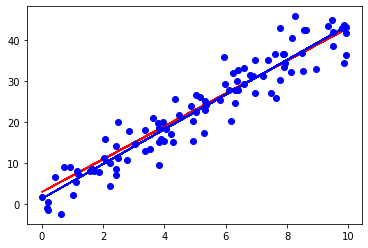

In [53]:
plt.plot(x, y, 'r-')
plt.plot(x, ytrain, 'bo')
plt.plot(x, ypred, 'b-')

In [54]:
mean_squared_error(ytrain, yhat) #random

14.88749845483183

In [56]:
mean_squared_error(ytrain, ypred) #Scikit

14.87522152241295

In [57]:
m.coef_, m.intercept_

(array([4.22729263]), 1.3685897947216077)

In [59]:
m.predict([[20]]) #to extrapolate to one value

array([85.91444231])